In [ ]:
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#boston = load_boston()
df = pd.read_csv('/content/drive/My Drive/dtc2.csv', encoding='latin-1')
df2 = pd.read_csv('/content/drive/My Drive/dci2.csv', encoding='latin-1')

In [ ]:
#x, y = df, df
#xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.15)
df.columns
def get_String_Month(n):
    i=n-1
    mes=['ENE', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AGO', 'SEP', 'OCT', 'NOV', 'DEC']
    return mes[i]

df['Mes_S']=df.apply(lambda r: get_String_Month(r['Mes']), axis=1)
df['NO_S'] =df.apply(lambda r: str(r['NO']), axis=1)
df['ND_S'] =df.apply(lambda r: str(r['ND']), axis=1)
df['NO_ND']=df.apply(lambda r: str(r['ND'])+'-'+str(r['NO']), axis=1)

In [ ]:
df2.columns
def get_String_Month(n):
    i=n-1
    mes=['ENE', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AGO', 'SEP', 'OCT', 'NOV', 'DEC']
    return mes[i]

df2['Mes_S']=df2.apply(lambda r: get_String_Month(r['Mes']), axis=1)
df2['NO_S'] =df2.apply(lambda r: str(r['NO']), axis=1)
df2['ND_S'] =df2.apply(lambda r: str(r['ND']), axis=1)
df2['NO_ND']=df2.apply(lambda r: str(r['ND'])+'-'+str(r['NO']), axis=1)

In [ ]:
x = df.drop(['IdF','DiaN','DemoraTotal','Mes', 'NO', 'ND', 'NO_S', 'ND_S'], axis=1)
x = pd.get_dummies(df)
y = df[['DemoraTotal']]
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.25)

In [ ]:
x2 = df2.drop(['IdF','DiaN','DemoraTotal','Mes', 'NO', 'ND', 'NO_S', 'ND_S'], axis=1)
x2 = pd.get_dummies(df2)
y2 = df2[['DemoraTotal']]
xtrain2, xtest2, ytrain2, ytest2=train_test_split(x2, y2, test_size=0.25)

In [ ]:
xgbr = xgb.XGBRegressor(objective='reg:squarederror',n_estimators=10, reg_lambda=2)
print(xgbr)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=10,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=2, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)


In [ ]:
xgbr.fit(xtrain, ytrain)
#xgbr.fit(xtrain2, ytrain2)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=10,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=2, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
 # - cross validataion 
scores = cross_val_score(xgbr, xtrain, ytrain, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, xtrain, ytrain, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
 


Mean cross-validation score: 0.84
K-fold CV average score: 0.84


In [ ]:
ypred = xgbr.predict(xtest)
mse = mean_squared_error(ytest, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(mse))

MSE: 210.78
RMSE: 14.52


In [ ]:
xgbr.fit(xtrain2, ytrain2)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=10,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=2, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
 # - cross validataion 
scores2 = cross_val_score(xgbr, xtrain2, ytrain2, cv=5)
print("Mean cross-validation score: %.2f" % scores2.mean())

#kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores2 = cross_val_score(xgbr, xtrain2, ytrain2, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores2.mean())
 


Mean cross-validation score: 0.85
K-fold CV average score: 0.85


In [ ]:
ypred2 = xgbr.predict(xtest2)
mse2 = mean_squared_error(ytest2, ypred2)
print("MSE: %.2f" % mse2)
print("RMSE: %.2f" % np.sqrt(mse2))


MSE: 97.92
RMSE: 9.90


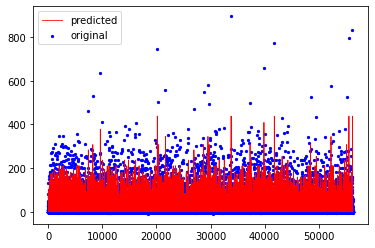

In [ ]:
x_ax = range(len(ytest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

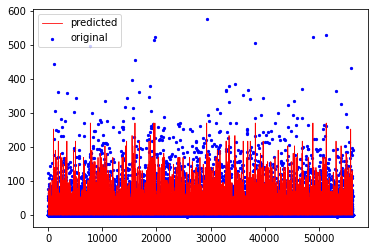

In [ ]:
x_ax2 = range(len(ytest2))
plt.scatter(x_ax2, ytest2, s=5, color="blue", label="original")
plt.plot(x_ax2, ypred2, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()